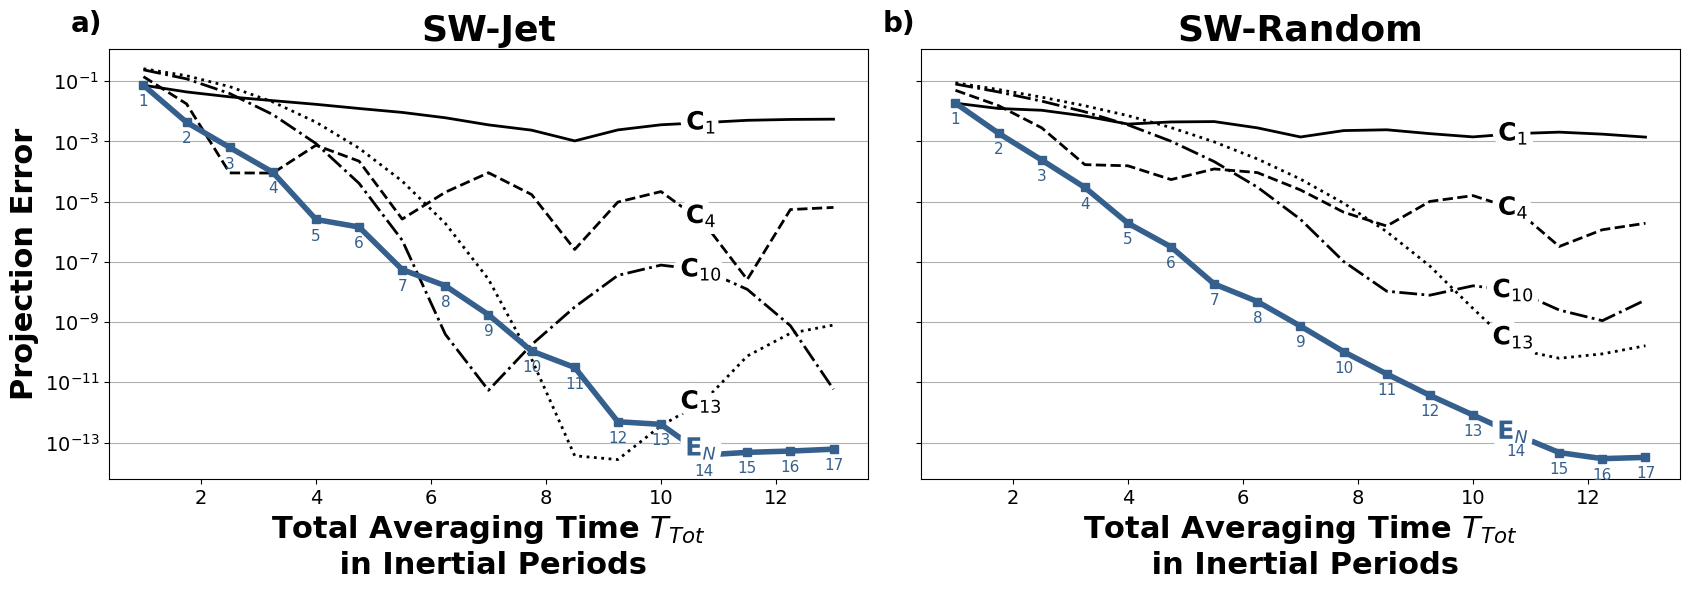

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

d_equi = xr.load_dataset("../data/geo_proj_error_equidistant_sw.nc", decode_timedelta=False)
d_con = xr.load_dataset("../data/geo_proj_error_constant_sw.nc", decode_timedelta=False)

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(17, 6), sharey=True)

colors = plt.cm.plasma(np.linspace(0.35, 0.6, len(d_con.number_chunks)))
s_color = plt.cm.viridis_r(0.7)

ave_period = d_con.total_averaging_time / (2 * np.pi)
titles = ["SW-Jet", "SW-Random"]

for ic, ax, label, title in zip(d_con.initial_condition, axs, ["a)", "b)"], titles):
    # plot the results of constant time chunks
    linestyles = iter(["-", "--", "-.", ":"])
    for n_ave, col in zip(d_con.number_chunks, colors):
        if n_ave == 7:
            continue
        ax.plot(ave_period,
                d_con.sel({"initial_condition": ic,
                           "number_chunks": n_ave}).averaging_error,
                c="black", lw=2, label=f"$\\mathbf {{C}}_{{{n_ave.item()}}}$", linestyle=next(linestyles),
        )


    # plot the results of equidistant time chunks
    ave_error = d_equi.sel({"initial_condition": ic}).averaging_error
    ax.plot(ave_period, ave_error, c=s_color, lw=4, marker="s", label=r"$\mathbf{E}_N$")

    # Create inline labels
    labelLines(ax.get_lines(), zorder=2.5, align=False, xvals=(10.7,10.7),
               fontsize=18, outline_width=10)

    # Add labels to the equidistant chunks
    for i, (x, y) in enumerate(zip(ave_period, ave_error), 1):
        ax.text(x, y*0.2, str(i), color=s_color, ha="center", fontsize=11)

    # labels etc.
    ax.tick_params(labelsize=14)
    ax.set_yscale("log")
    ax.grid(axis="y")
    ax.set_title(title, fontsize=26, fontweight="bold")
    ax.set_xlabel("Total Averaging Time $T_{Tot}$ \n in Inertial Periods", fontsize=22, fontweight="bold")

    # Create a, b labels
    ax.text(-0.05, 1.04, label, transform=ax.transAxes,
            fontsize=20, fontweight="bold")

axs[0].set_ylabel("Projection Error", fontsize=22, fontweight="bold")
plt.savefig("../figures/averaging_error.png", dpi=200)